<a href="https://colab.research.google.com/github/vedvyas86564/ROAR-Academy/blob/main/AutoRegressive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib pandas torch scikit-learn


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

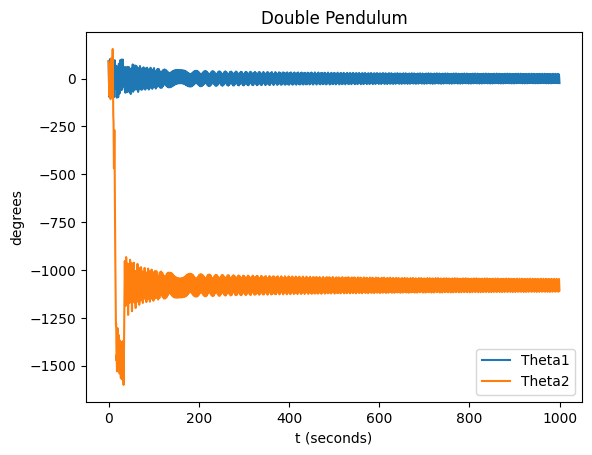

Epoch 1, Train Loss: 0.0471, Validation Loss: 0.0074
Epoch 2, Train Loss: 0.0060, Validation Loss: 0.0064
Epoch 3, Train Loss: 0.0052, Validation Loss: 0.0053
Epoch 4, Train Loss: 0.0040, Validation Loss: 0.0039
Epoch 5, Train Loss: 0.0029, Validation Loss: 0.0029
Epoch 6, Train Loss: 0.0021, Validation Loss: 0.0020
Epoch 7, Train Loss: 0.0013, Validation Loss: 0.0012
Epoch 8, Train Loss: 0.0006, Validation Loss: 0.0006
Epoch 9, Train Loss: 0.0004, Validation Loss: 0.0003
Epoch 10, Train Loss: 0.0003, Validation Loss: 0.0004
Epoch 11, Train Loss: 0.0003, Validation Loss: 0.0002
Epoch 12, Train Loss: 0.0002, Validation Loss: 0.0002
Epoch 13, Train Loss: 0.0002, Validation Loss: 0.0002
Epoch 14, Train Loss: 0.0002, Validation Loss: 0.0002
Epoch 15, Train Loss: 0.0002, Validation Loss: 0.0002
Epoch 16, Train Loss: 0.0002, Validation Loss: 0.0001
Epoch 17, Train Loss: 0.0001, Validation Loss: 0.0003
Epoch 18, Train Loss: 0.0001, Validation Loss: 0.0003
Epoch 19, Train Loss: 0.0001, Validat

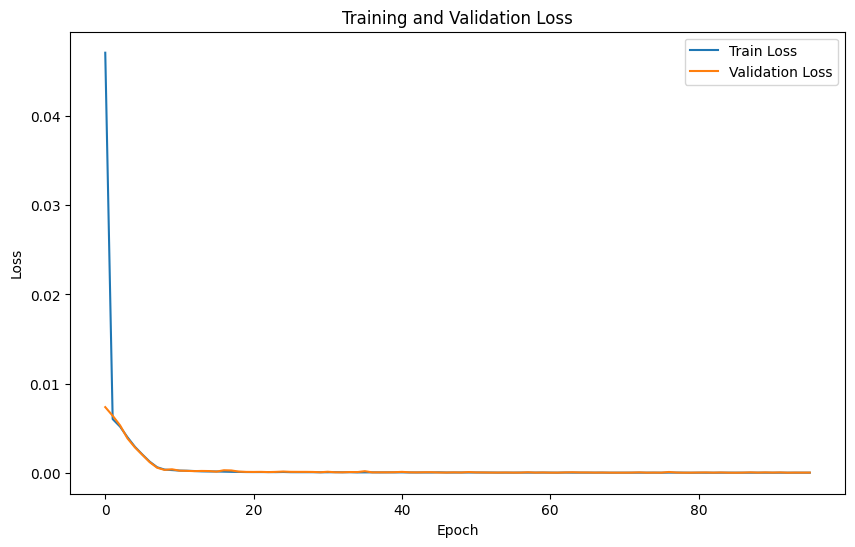

Test RMSE: 0.0061
R^2 Score: 0.9963


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi
from numpy import array
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error, r2_score

# Constants for the double pendulum
g = 9.81
L1 = 1
L2 = 1
m1 = 1.0
m2 = 1.0

def f(r, t, L1, L2):
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]
    ftheta1 = omega1
    fomega1 = (-g * (2 * m1 + m2) * sin(theta1) - m2 * g * sin(theta1 - 2 * theta2) - 2 * sin(theta1 - theta2) * m2 *
               (omega2**2 * L2 + omega1**2 * L1 * cos(theta1 - theta2))) / (L1 * (2 * m1 + m2 - m2 * cos(2 * theta1 - 2 * theta2)))
    ftheta2 = omega2
    fomega2 = (2 * sin(theta1 - theta2) * (omega1**2 * L1 * (m1 + m2) + g * (m1 + m2) * cos(theta1) + omega2**2 * L2 * m2 *
                                           cos(theta1 - theta2))) / (L2 * (2 * m1 + m2 - m2 * cos(2 * theta1 - 2 * theta2)))
    return array([ftheta1, fomega1, ftheta2, fomega2], float)

a = 0.0
b = 1000
N = 10000
h = (b - a) / N

tpoints = np.arange(a, b, h)
theta1_points = np.zeros_like(tpoints)
theta2_points = np.zeros_like(tpoints)
q = np.array([pi / 2, 0, pi / 2, 0], float)

for i, t in enumerate(tpoints):
    theta1_points[i] = q[0] * 180 / pi
    theta2_points[i] = q[2] * 180 / pi
    k1 = h * f(q, t, L1, L2)
    k2 = h * f(q + 0.5 * k1, t + 0.5 * h, L1, L2)
    k3 = h * f(q + 0.5 * k2, t + 0.5 * h, L1, L2)
    k4 = h * f(q + k3, t + h, L1, L2)
    q += (k1 + 2 * k2 + 2 * k3 + k4) / 6

plt.plot(tpoints, theta1_points, label='Theta1')
plt.plot(tpoints, theta2_points, label='Theta2')
plt.title("Double Pendulum")
plt.xlabel("t (seconds)")
plt.ylabel("degrees")
plt.legend()
plt.show()

# Combine Data
data = np.stack((theta1_points, theta2_points), axis=1)
np.save('pendulum_data.npy', data)

# Load Data
data = np.load('pendulum_data.npy')

# Normalize Data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Create Sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Create Training and Testing Sets
SEQ_LENGTH = 50
X, Y = create_sequences(data, SEQ_LENGTH)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(Y_train, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(Y_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define Autoregressive Model
class AutoregressiveModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(AutoregressiveModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        y_pred = self.linear(lstm_out[:, -1, :])
        return y_pred

input_size = 2
hidden_layer_size = 100
output_size = 2

# Create Autoregressive Model
model = AutoregressiveModel(input_size, hidden_layer_size, output_size)

# Initialize Weights and Biases
for name, param in model.named_parameters():
    if 'weight' in name:
        nn.init.xavier_normal_(param)  # Xavier initialization
    elif 'bias' in name:
        nn.init.uniform_(param, -1, 1)

# Initialize Loss and Optimizer
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
NUM_EPOCHS = 100
PATIENCE = 10

# Train Model with Loss Tracking and Early Stopping
train_losses = []
val_losses = []

def train_model(model, train_loader, val_loader, num_epochs, patience):
    best_val_loss = float('inf')
    epochs_no_improve = 0
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for sequences, targets in train_loader:
            optimizer.zero_grad()
            y_pred = model(sequences)
            loss = loss_function(y_pred, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for sequences, targets in val_loader:
                y_pred = model(sequences)
                loss = loss_function(y_pred, targets)
                val_loss += loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        if epochs_no_improve == patience:
            print(f'Early stopping at epoch {epoch+1}')
            break

train_model(model, train_loader, test_loader, NUM_EPOCHS, PATIENCE)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate Model
def evaluate_model(model, test_loader):
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for sequences, targets in test_loader:
            y_pred = model(sequences)
            all_predictions.append(y_pred.numpy())
            all_targets.append(targets.numpy())

    all_predictions = np.concatenate(all_predictions, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)

    rmse = np.sqrt(mean_squared_error(all_targets, all_predictions))
    r2 = r2_score(all_targets, all_predictions)

    print(f'Test RMSE: {rmse:.4f}')
    print(f'R^2 Score: {r2:.4f}')

evaluate_model(model, test_loader)


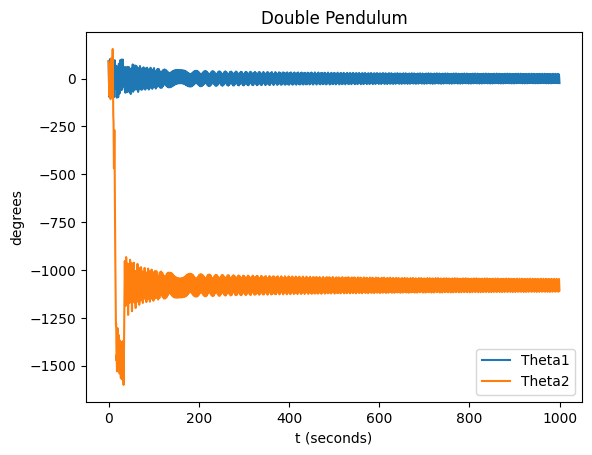

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from numpy import sin, cos, array, pi

# Constants for the double pendulum
g = 9.81
L1 = 1
L2 = 1
m1 = 1.0
m2 = 1.0

def f(r, t, L1, L2):
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]
    ftheta1 = omega1
    fomega1 = (-g * (2 * m1 + m2) * sin(theta1) - m2 * g * sin(theta1 - 2 * theta2) - 2 * sin(theta1 - theta2) * m2 *
               (omega2**2 * L2 + omega1**2 * L1 * cos(theta1 - theta2))) / (L1 * (2 * m1 + m2 - m2 * cos(2 * theta1 - 2 * theta2)))
    ftheta2 = omega2
    fomega2 = (2 * sin(theta1 - theta2) * (omega1**2 * L1 * (m1 + m2) + g * (m1 + m2) * cos(theta1) + omega2**2 * L2 * m2 *
                                           cos(theta1 - theta2))) / (L2 * (2 * m1 + m2 - m2 * cos(2 * theta1 - 2 * theta2)))
    return array([ftheta1, fomega1, ftheta2, fomega2], float)

a = 0.0
b = 1000
N = 10000
h = (b - a) / N

tpoints = np.arange(a, b, h)
theta1_points = np.zeros_like(tpoints)
theta2_points = np.zeros_like(tpoints)
q = np.array([pi / 2, 0, pi / 2, 0], float)

for i, t in enumerate(tpoints):
    theta1_points[i] = q[0] * 180 / pi
    theta2_points[i] = q[2] * 180 / pi
    k1 = h * f(q, t, L1, L2)
    k2 = h * f(q + 0.5 * k1, t + 0.5 * h, L1, L2)
    k3 = h * f(q + 0.5 * k2, t + 0.5 * h, L1, L2)
    k4 = h * f(q + k3, t + h, L1, L2)
    q += (k1 + 2 * k2 + 2 * k3 + k4) / 6

plt.plot(tpoints, theta1_points, label='Theta1')
plt.plot(tpoints, theta2_points, label='Theta2')
plt.title("Double Pendulum")
plt.xlabel("t (seconds)")
plt.ylabel("degrees")
plt.legend()
plt.show()

# Combine Data
data = np.stack((theta1_points, theta2_points), axis=1)
np.save('pendulum_data.npy', data)

# Load Data
data = np.load('pendulum_data.npy')

# Normalize Data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Create Sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Create Training and Testing Sets
SEQ_LENGTH = 50
X, Y = create_sequences(data, SEQ_LENGTH)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Gaussian Process Regressor
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1, length_scale_bounds=(1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Reshape X_train and X_test for Gaussian Process Regressor
X_train_reshaped = X_train.reshape(-1, SEQ_LENGTH * X_train.shape[2])
X_test_reshaped = X_test.reshape(-1, SEQ_LENGTH * X_test.shape[2])

# Fit the model
gpr.fit(X_train_reshaped, Y_train)

# Predict on the test set
Y_pred, sigma = gpr.predict(X_test_reshaped, return_std=True)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f'Test RMSE: {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')

# Plot Predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_test[:, 0], label='True Theta1')
plt.plot(Y_pred[:, 0], label='Predicted Theta1')
plt.xlabel('Time Step')
plt.ylabel('Normalized Angle')
plt.legend()
plt.title('True vs Predicted Theta1')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test[:, 1], label='True Theta2')
plt.plot(Y_pred[:, 1], label='Predicted Theta2')
plt.xlabel('Time Step')
plt.ylabel('Normalized Angle')
plt.legend()
plt.title('True vs Predicted Theta2')
plt.show()


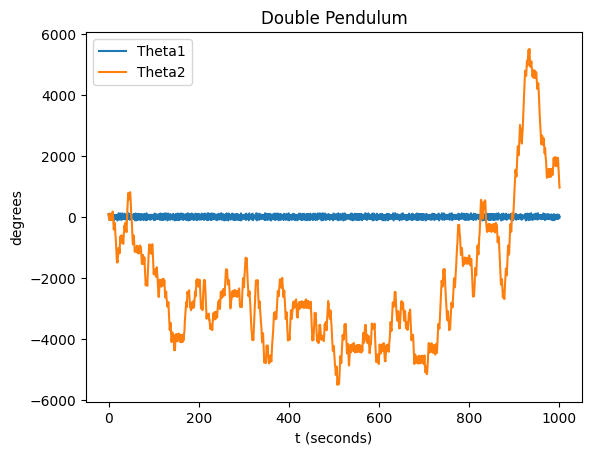

Epoch [1/100], Loss: 0.000139
Epoch [2/100], Loss: 0.000007
Epoch [3/100], Loss: 0.000004
Epoch [4/100], Loss: 0.000003
Epoch [5/100], Loss: 0.000003
Epoch [6/100], Loss: 0.000002
Epoch [7/100], Loss: 0.000002
Epoch [8/100], Loss: 0.000002
Epoch [9/100], Loss: 0.000002
Epoch [10/100], Loss: 0.000002
Epoch [11/100], Loss: 0.000002
Epoch [12/100], Loss: 0.000002
Epoch [13/100], Loss: 0.000001
Epoch [14/100], Loss: 0.000001
Epoch [15/100], Loss: 0.000001
Epoch [16/100], Loss: 0.000001
Epoch [17/100], Loss: 0.000001
Epoch [18/100], Loss: 0.000001
Epoch [19/100], Loss: 0.000001
Epoch [20/100], Loss: 0.000001
Epoch [21/100], Loss: 0.000001
Epoch [22/100], Loss: 0.000001
Epoch [23/100], Loss: 0.000001
Epoch [24/100], Loss: 0.000001
Epoch [25/100], Loss: 0.000001
Epoch [26/100], Loss: 0.000001
Epoch [27/100], Loss: 0.000001
Epoch [28/100], Loss: 0.000001
Epoch [29/100], Loss: 0.000001
Epoch [30/100], Loss: 0.000001
Epoch [31/100], Loss: 0.000001
Epoch [32/100], Loss: 0.000001
Epoch [33/100], L

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from torch.utils.data import TensorDataset, DataLoader

# Parameters
g = 9.81
L1 = 1
L2 = 1
m1 = 1.0
m2 = 1.0
friction = 0.1  # Friction coefficient

# Equations of motion with friction
def f(r, t, L1, L2, friction):
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]

    ftheta1 = omega1
    fomega1 = (-g * (2 * m1 + m2) * sin(theta1) - m2 * g * sin(theta1 - 2 * theta2)
               - 2 * sin(theta1 - theta2) * m2 * (omega2**2 * L2 + omega1**2 * L1 * cos(theta1 - theta2))
               - friction * omega1) / \
              (L1 * (2 * m1 + m2 - m2 * cos(2 * theta1 - 2 * theta2)))

    ftheta2 = omega2
    fomega2 = (2 * sin(theta1 - theta2) * (omega1**2 * L1 * (m1 + m2) + g * (m1 + m2) * cos(theta1)
                                           + omega2**2 * L2 * m2 * cos(theta1 - theta2))
               - friction * omega2) / \
              (L2 * (2 * m1 + m2 - m2 * cos(2 * theta1 - 2 * theta2)))

    return np.array([ftheta1, fomega1, ftheta2, fomega2], float)

# Integration parameters
a = 0.0
b = 1000
N = 1000000
h = (b - a) / N

tpoints = np.arange(a, b, h)
theta1_points = np.zeros_like(tpoints)
theta2_points = np.zeros_like(tpoints)

q = np.array([pi / 2, 0, pi / 2, 0], float)

for i, t in enumerate(tpoints):
    theta1_points[i] = q[0] * 180 / pi
    theta2_points[i] = q[2] * 180 / pi

    k1 = h * f(q, t, L1, L2, friction)
    k2 = h * f(q + 0.5 * k1, t + 0.5 * h, L1, L2, friction)
    k3 = h * f(q + 0.5 * k2, t + 0.5 * h, L1, L2, friction)
    k4 = h * f(q + k3, t + h, L1, L2, friction)
    q += (k1 + 2 * k2 + 2 * k3 + k4) / 6

plt.plot(tpoints, theta1_points, label='Theta1')
plt.plot(tpoints, theta2_points, label='Theta2')
plt.title("Double Pendulum with Friction")
plt.xlabel("t (seconds)")
plt.ylabel("degrees")
plt.legend()
plt.show()

data = np.stack((theta1_points, theta2_points), axis=1)
np.save('pendulum_data.npy', data)

data = np.load('pendulum_data.npy')

scaler = MinMaxScaler(feature_range=(-1, 1))
data_normalized = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 50

X, y = create_sequences(data_normalized, SEQ_LENGTH)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class FeedforwardNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_dim * SEQ_LENGTH, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        batch_size = x.size(0)
        seq_length = x.size(1)
        input_dim = x.size(2)
        x = x.view(batch_size, seq_length * input_dim)  # Flatten along batch size and sequence length dimension
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_dim = 2
hidden_dim = 64
output_dim = 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FeedforwardNN(input_dim, hidden_dim, output_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.size(0)

    avg_loss = total_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.6f}')

model.eval()
predictions = []
with torch.no_grad():
    for data, targets in test_loader:
        data, targets = data.to(device), targets.to(device)
        outputs = model(data)
        predictions.append(outputs.cpu().numpy())

predictions = np.concatenate(predictions, axis=0)
y_test = y_test.cpu().numpy()

rmse = np.sqrt(np.mean((predictions - y_test)**2))
print(f'Test RMSE: {rmse:.6f}')

r2 = r2_score(y_test, predictions)
print(f'Test R^2 Score: {r2:.6f}')
